<a href="https://colab.research.google.com/github/Kreijstal/kreijstal-collaboratory/blob/master/fuwed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manim on google collab?
*Press ctrl f9 to run everything*

or 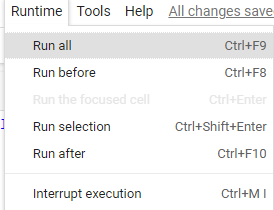

why bother installing manim yourself when daddy google does it for you?

this section installs and configures manim and other globals

In [0]:
!git clone https://github.com/3b1b/manim.git

In [0]:
cd manim

In [0]:
!apt-get install -qqy --no-install-recommends \
        apt-utils \
        ffmpeg \
        sox \
        libcairo2-dev \
        texlive \
        texlive-fonts-extra \
        texlive-latex-extra \
        texlive-latex-recommended \
        texlive-science \
        tipa \

In [0]:
!python setup.py sdist

In [0]:
!python -m pip install dist/manimlib*

In [0]:
#pip3 install -q jupyter-manim

In [0]:
# Copyright 2017 Google Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""Colab-specific file helpers."""

from __future__ import absolute_import as _
from __future__ import division as _
from __future__ import print_function as _

import base64 as _base64
import collections as _collections
import os as _os
import socket as _socket
import threading as _threading
import uuid as _uuid

import IPython as _IPython
import portpicker as _portpicker
import six as _six
from six.moves import SimpleHTTPServer as _SimpleHTTPServer
from six.moves import socketserver as _socketserver
from six.moves import urllib as _urllib

from google.colab import output as _output
from IPython.display import display, HTML
js = """<div id=\"put\">
<script>document.getElementById(\"put\").innerHTML=\"sup\"</script>
"""

def _get_unique_filename(filename):
  if not _os.path.lexists(filename):
    return filename
  counter = 1
  while True:
    path, ext = _os.path.splitext(filename)
    new_filename = '{} ({}){}'.format(path, counter, ext)
    if not _os.path.lexists(new_filename):
      return new_filename
    counter += 1


class _V6Server(_socketserver.TCPServer):
  address_family = _socket.AF_INET6


class _FileHandler(_SimpleHTTPServer.SimpleHTTPRequestHandler):
  """SimpleHTTPRequestHandler with a couple tweaks."""

  def translate_path(self, path):
    # Client specifies absolute paths.
    # TODO(b/79760241): Remove this spurious lint warning.
    return _urllib.parse.unquote(path)  # pylint:disable=too-many-function-args

  def log_message(self, fmt, *args):
    # Suppress logging since it's on the background. Any errors will be reported
    # via the handler.
    pass

  def end_headers(self):
    # Do not cache the response in the notebook, since it may be quite large.
    self.send_header('x-colab-notebook-cache-control', 'no-cache')
    _SimpleHTTPServer.SimpleHTTPRequestHandler.end_headers(self)


def download(filename):
  """Downloads the file to the user's local disk via a browser download action.
  Args:
    filename: Name of the file on disk to be downloaded.
  Raises:
    OSError: if the file cannot be found.
  """

  if not _os.path.exists(filename):
    msg = 'Cannot find file: {}'.format(filename)
    if _six.PY2:
      raise OSError(msg)
    else:
      raise FileNotFoundError(msg)  # pylint: disable=undefined-variable

  started = _threading.Event()
  port = _portpicker.pick_unused_port()

  def server_entry():
    httpd = _V6Server(('::', port), _FileHandler)
    started.set()
    # Handle a single request then exit the thread.
    httpd.handle_request()

  thread = _threading.Thread(target=server_entry)
  thread.start()
  started.wait()
  display(HTML( ("""
  <div id=\"put\">Wait for the video to load/download</div><script>
      (async function() {
        const response = await fetch('https://localhost:%(port)d%(path)s');
        if (!response.ok) {
          throw new Error('Failed to download: ' + response.statusText);
        }
        const blob = await response.blob();
        const a = document.createElement('a');
        a.href = window.URL.createObjectURL(blob);
        a.download = '%(name)s';
        a.innerHTML="download file here"
        document.getElementById("put").innerHTML=`<video width="960" height="720" controls>
  <source src="${a.href}" type="video/mp4">
</video>`
        document.getElementById("put").appendChild(a);
        //document.write(a);
        //a.click();
        //a.remove();
      })();
      </script>
  """ % {
      'port': port,
      'path': _os.path.abspath(filename),
      'name': _os.path.basename(filename),
  })))


# Running manim from collab
I called manim.py and just did it

In [0]:
!python manim.py example_scenes.py OpeningManimExample

In [0]:
download("media/videos/example_scenes/1440p60/OpeningManimExample.mp4")